In [7]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas\\ECA_blended_custom'

In [207]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,6)

In [155]:
df = pd.read_csv('TG_STAID002759.txt', sep=',', skiprows = 19)

In [156]:
df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [157]:
df.columns = ['SOUID', 'DATE', 'TG', 'Q_TG']

In [158]:
df.isna().sum()

SOUID    0
DATE     0
TG       0
Q_TG     0
dtype: int64

In [159]:
df['date']= pd.to_datetime(df['DATE'].astype(str))
df['year']= pd.to_datetime(df['DATE'].astype(str)).dt.year
df['month']= pd.to_datetime(df['DATE'].astype(str)).dt.month
df['day']= pd.to_datetime(df['DATE'].astype(str)).dt.day
df.set_index('date', inplace= True)

In [160]:
# the unit of the temperature is 0.1 °C
df['Celsius']=df['TG'] * 0.1
df['Kelvin'] = df['Celsius'] + 273.15

df.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin
date,,,,,,,,,
1876-01-01,127488,18760101,22,0,1876,1,1,2.2,275.35
1876-01-02,127488,18760102,25,0,1876,1,2,2.5,275.65
1876-01-03,127488,18760103,3,0,1876,1,3,0.3,273.45
1876-01-04,127488,18760104,-58,0,1876,1,4,-5.8,267.35
1876-01-05,127488,18760105,-98,0,1876,1,5,-9.8,263.35


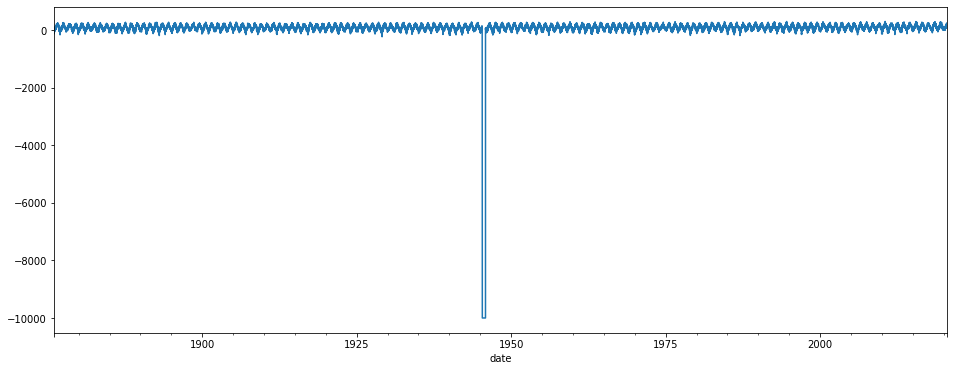

In [161]:
df['TG'].plot()

In [162]:
df['TG'].describe()

count    52777.000000
mean        56.462758
std        617.384226
min      -9999.000000
25%         33.000000
50%         93.000000
75%        157.000000
max        305.000000
Name: TG, dtype: float64

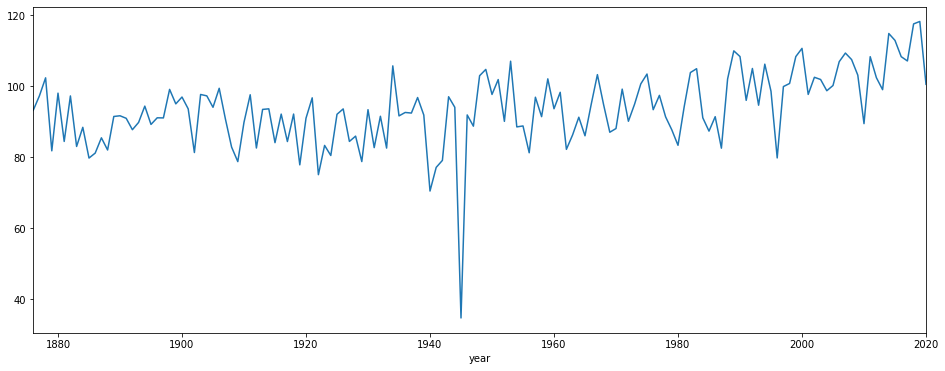

In [163]:
df = df.loc[df['TG'] > -3000]
df.groupby(['year'])['TG'].mean().plot()

In [164]:
df = df['1960':]

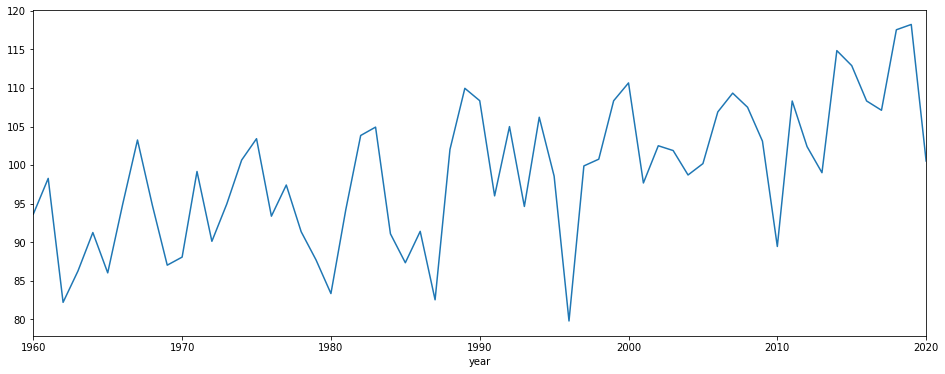

In [165]:
df.groupby(['year'])['TG'].mean().plot()

In [166]:
df.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin
date,,,,,,,,,
1960-01-01,111448,19600101,64,0,1960,1,1,6.4,279.55
1960-01-02,111448,19600102,81,0,1960,1,2,8.1,281.25
1960-01-03,111448,19600103,54,0,1960,1,3,5.4,278.55
1960-01-04,111448,19600104,39,0,1960,1,4,3.9,277.05
1960-01-05,111448,19600105,60,0,1960,1,5,6.0,279.15


In [167]:
df.tail()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin
date,,,,,,,,,
2020-06-26,111448,20200626,226,0,2020,6,26,22.6,295.75
2020-06-27,111448,20200627,250,0,2020,6,27,25.0,298.15
2020-06-28,111448,20200628,224,0,2020,6,28,22.4,295.55
2020-06-29,111448,20200629,196,0,2020,6,29,19.6,292.75
2020-06-30,111448,20200630,198,0,2020,6,30,19.8,292.95


In [168]:
#split data

y_train= df2['1960-07-01': '2019-06-30'].copy()
y_test = df2['2019-07-01': '2020-07-01'].copy()

In [169]:
y_train.shape , y_test.shape

((21549, 9), (366, 9))

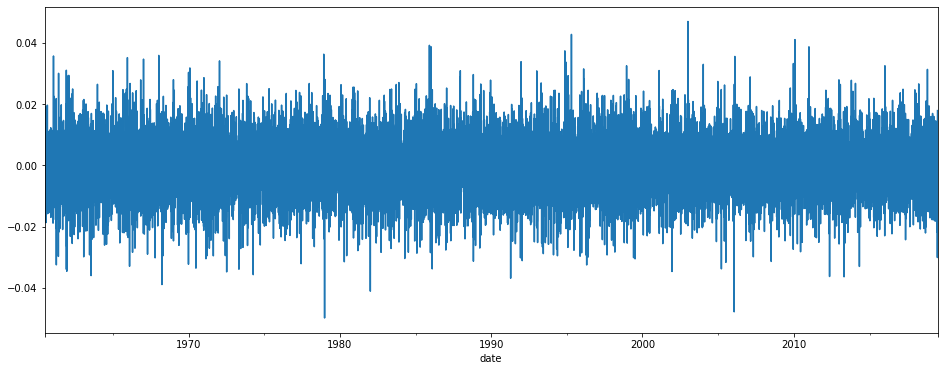

In [170]:
# Create the pct_change
y_train['pct_change'] = y_train['Kelvin'].pct_change()

# Plot the pct_change
y_train['pct_change'].plot()

In [171]:
# Create monthly means of the pct_change
y_train['monthly_means'] = y_train.groupby('month')['pct_change'].transform('mean')
y_train.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,pct_change,monthly_means
date,,,,,,,,,,,
1960-07-01,111448,19600701,113,0,1960,7,1,11.3,284.45,NaN,0.000325
1960-07-02,111448,19600702,124,0,1960,7,2,12.4,285.55,0.003867,0.000325
1960-07-03,111448,19600703,115,0,1960,7,3,11.5,284.65,-0.003152,0.000325
1960-07-04,111448,19600704,121,0,1960,7,4,12.1,285.25,0.002108,0.000325
1960-07-05,111448,19600705,153,0,1960,7,5,15.3,288.45,0.011218,0.000325


In [172]:
# Subtract the monthly mean from the actual values
y_train['deseasonalized'] = y_train['pct_change'] - y_train['monthly_means']
y_train.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,pct_change,monthly_means,deseasonalized
date,,,,,,,,,,,,
1960-07-01,111448,19600701,113,0,1960,7,1,11.3,284.45,NaN,0.000325,NaN
1960-07-02,111448,19600702,124,0,1960,7,2,12.4,285.55,0.003867,0.000325,0.003542
1960-07-03,111448,19600703,115,0,1960,7,3,11.5,284.65,-0.003152,0.000325,-0.003477
1960-07-04,111448,19600704,121,0,1960,7,4,12.1,285.25,0.002108,0.000325,0.001783
1960-07-05,111448,19600705,153,0,1960,7,5,15.3,288.45,0.011218,0.000325,0.010893


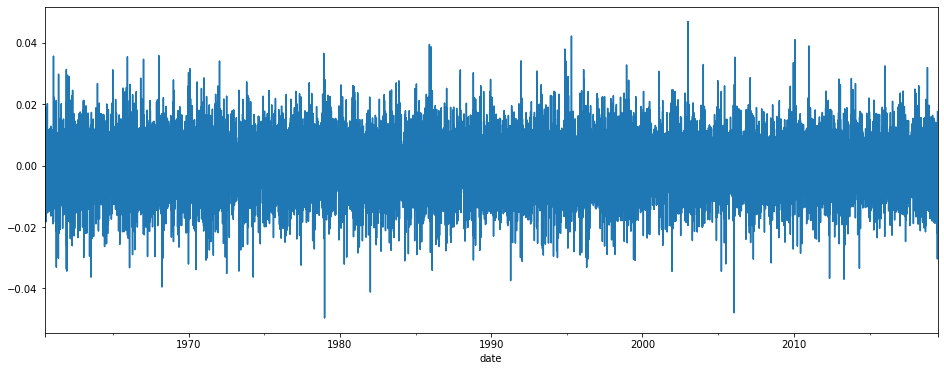

In [173]:
# Plot the deseasonalized data
y_train['deseasonalized'].plot()

In [174]:
# Define a function that plots the forecast
def plot_forecast(y_train, y_test, columns):
    '''
    Plots forecasts of temperature( Kelvin)
    
    Params:
    -------
    y_train: The training data
    y_test: The test data
    columns: Name of the prediction columns form a DataFrame
    
    '''
    # Plot the actual values
    y_train.Kelvin.plot(label='Training Data')
    y_test.Kelvin.plot(label=('Test Data'))
    
    # Plot each prediction
    for column in columns:
        y_test[column].plot(label=column)
    
    # General settings
    plt.title('temperature per month over Time', fontsize=15)
    plt.ylabel('temperature in Kelvin', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend()
    # plt.savefig('mean_baseline.png')
    plt.show()

In [175]:
# The seasonal means of the detrended time series

In [176]:
# Take the monthly means of the pct_change
y_train.groupby('month')['pct_change'].mean()

month
1     0.000088
2     0.000292
3     0.000609
4     0.000602
5     0.000434
6     0.000313
7     0.000325
8    -0.000351
9    -0.000507
10   -0.000558
11   -0.000542
12   -0.000229
Name: pct_change, dtype: float64

In [177]:
len(y_test)

366

In [178]:
# Create a new column containing the monthly mean percentage changes
y_test['y_pred_monthly_means_pct'] = y_train['monthly_means'][:366].values
y_test.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,y_pred_monthly_means_pct
date,,,,,,,,,,
2019-07-01,111448,20190701,231,0,2019,7,1,23.1,296.25,0.000325
2019-07-02,111448,20190702,182,0,2019,7,2,18.2,291.35,0.000325
2019-07-03,111448,20190703,163,0,2019,7,3,16.3,289.45,0.000325
2019-07-04,111448,20190704,177,0,2019,7,4,17.7,290.85,0.000325
2019-07-05,111448,20190705,188,0,2019,7,5,18.8,291.95,0.000325


In [179]:
# Add 1 to that value
y_test['y_pred_monthly_means_pct'] += 1
y_test.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,y_pred_monthly_means_pct
date,,,,,,,,,,
2019-07-01,111448,20190701,231,0,2019,7,1,23.1,296.25,1.000325
2019-07-02,111448,20190702,182,0,2019,7,2,18.2,291.35,1.000325
2019-07-03,111448,20190703,163,0,2019,7,3,16.3,289.45,1.000325
2019-07-04,111448,20190704,177,0,2019,7,4,17.7,290.85,1.000325
2019-07-05,111448,20190705,188,0,2019,7,5,18.8,291.95,1.000325


In [180]:
y_test['y_pred_monthly_means_pct'] = np.cumprod(y_test['y_pred_monthly_means_pct'])

In [181]:
last_observation = y_train['Kelvin'][-1]

In [182]:
y_test['y_pred_monthly_means_pct'] *= last_observation 

In [183]:
y_test.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,y_pred_monthly_means_pct
date,,,,,,,,,,
2019-07-01,111448,20190701,231,0,2019,7,1,23.1,296.25,302.048108
2019-07-02,111448,20190702,182,0,2019,7,2,18.2,291.35,302.146249
2019-07-03,111448,20190703,163,0,2019,7,3,16.3,289.45,302.244421
2019-07-04,111448,20190704,177,0,2019,7,4,17.7,290.85,302.342625
2019-07-05,111448,20190705,188,0,2019,7,5,18.8,291.95,302.440861


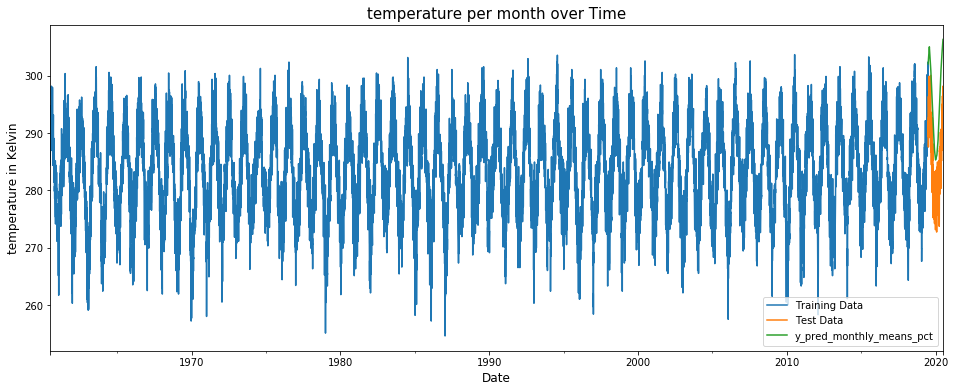

In [184]:
plot_forecast(y_train, y_test, ['y_pred_monthly_means_pct'])

In [185]:
# let´s check it for a shorter period
y_train_period = y_train['2010': '2020']

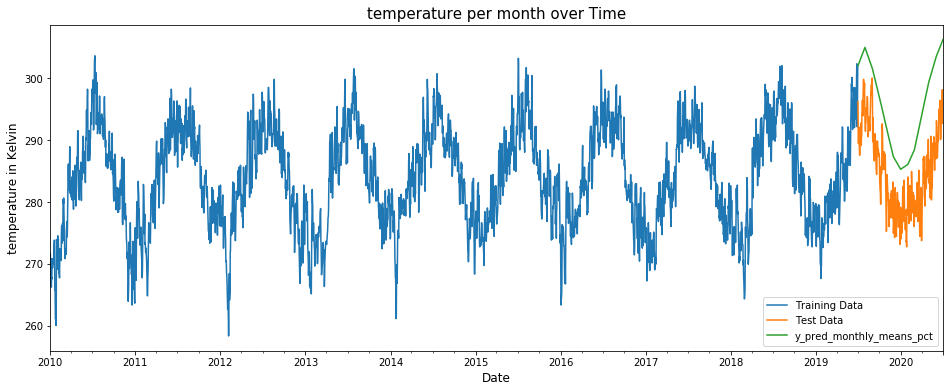

In [186]:
plot_forecast(y_train_period, y_test, ['y_pred_monthly_means_pct'])

In [187]:
# Persistence Forecast

In [188]:
y_test['Kelvin'].shift()

date
2019-07-01       NaN
2019-07-02    296.25
2019-07-03    291.35
2019-07-04    289.45
2019-07-05    290.85
               ...  
2020-06-26    296.55
2020-06-27    295.75
2020-06-28    298.15
2020-06-29    295.55
2020-06-30    292.75
Name: Kelvin, Length: 366, dtype: float64

In [189]:
# Always predict the last observed value
y_test['y_pred_persistence'] = y_test['Kelvin'].shift()
y_test.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,y_pred_monthly_means_pct,y_pred_persistence
date,,,,,,,,,,,
2019-07-01,111448,20190701,231,0,2019,7,1,23.1,296.25,302.048108,NaN
2019-07-02,111448,20190702,182,0,2019,7,2,18.2,291.35,302.146249,296.25
2019-07-03,111448,20190703,163,0,2019,7,3,16.3,289.45,302.244421,291.35
2019-07-04,111448,20190704,177,0,2019,7,4,17.7,290.85,302.342625,289.45
2019-07-05,111448,20190705,188,0,2019,7,5,18.8,291.95,302.440861,290.85


In [143]:
y_test.loc['2010-01-01', 'y_pred_persistence'] = last_observation
y_test.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,y_pred_monthly_means_pct,y_pred_persistence
date,,,,,,,,,,,
2019-07-01 00:00:00,111448.0,20190701.0,231.0,0.0,2019.0,7.0,1.0,23.1,296.25,302.048108,NaN
2019-07-02 00:00:00,111448.0,20190702.0,182.0,0.0,2019.0,7.0,2.0,18.2,291.35,302.146249,296.25
2019-07-03 00:00:00,111448.0,20190703.0,163.0,0.0,2019.0,7.0,3.0,16.3,289.45,302.244421,291.35
2019-07-04 00:00:00,111448.0,20190704.0,177.0,0.0,2019.0,7.0,4.0,17.7,290.85,302.342625,289.45
2019-07-05 00:00:00,111448.0,20190705.0,188.0,0.0,2019.0,7.0,5.0,18.8,291.95,302.440861,290.85


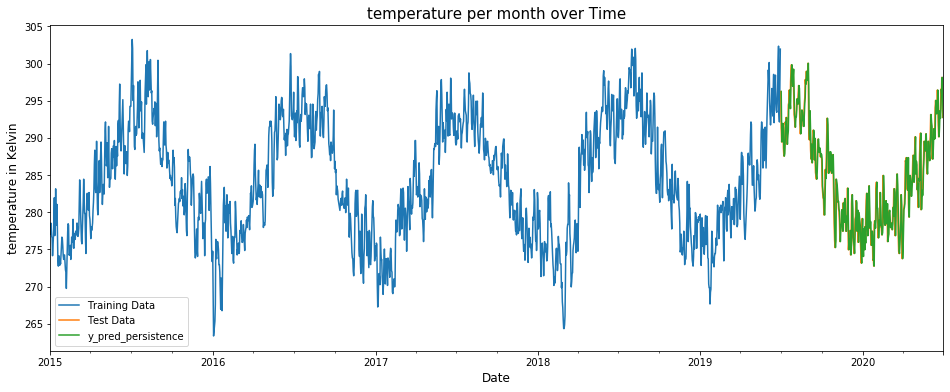

In [191]:
# Plot the prediction
y_train_period = y_train['2015': '2020']
plot_forecast(y_train_period, y_test, ['y_pred_persistence'])

In [195]:
y_test.head()

,SOUID,DATE,TG,Q_TG,year,month,day,Celsius,Kelvin,y_pred_monthly_means_pct,y_pred_persistence
date,,,,,,,,,,,
2019-07-01,111448,20190701,231,0,2019,7,1,23.1,296.25,302.048108,NaN
2019-07-02,111448,20190702,182,0,2019,7,2,18.2,291.35,302.146249,296.25
2019-07-03,111448,20190703,163,0,2019,7,3,16.3,289.45,302.244421,291.35
2019-07-04,111448,20190704,177,0,2019,7,4,17.7,290.85,302.342625,289.45
2019-07-05,111448,20190705,188,0,2019,7,5,18.8,291.95,302.440861,290.85


In [201]:
predictions = y_test.columns[9:]

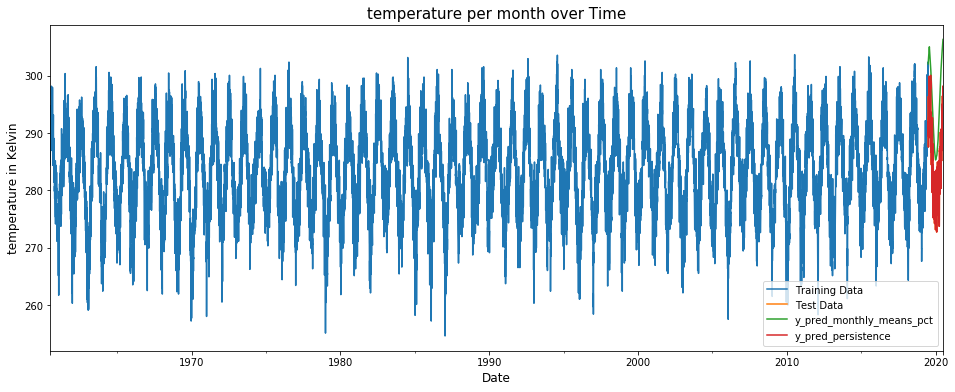

In [202]:
plot_forecast(y_train, y_test, predictions)

In [204]:
# let´s see for a shorter period 
y_train_period = y_train['2015': '2020']

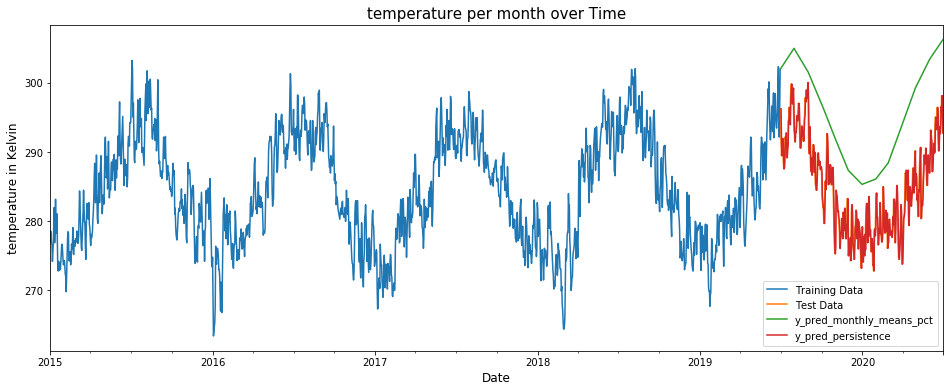

In [205]:
predictions2 = y_test.columns[9:]
plot_forecast(y_train_period, y_test, predictions2)